## Import Data and Library

### Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from zipfile import ZipFile

### Import Data

In [2]:
with ZipFile('big-startup-secsees-fail-dataset-from-crunchbase.zip') as raw_zip:
    raw_zip.extractall(path='datasets')
    
    raw_data = pd.read_csv('datasets/big_startup_secsees_dataset.csv')

In [3]:
raw_data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


## Data Inspection

### Total Amount of Rows and Columns

In [4]:
raw_data.shape

(66368, 14)

### Data Fields

In [5]:
raw_data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

#### Data Fields Information
1. permalink: Link to Organization
2. name: Company Name
3. homepage_url: Startup Site
4. category_list: Field of company
5. funding_total_usd: Total Funding in USD
6. status: Operating Status
7. country_code: Country Code
8. state_code: State Code of company location
9. region: Region of company location
10. city: Cit of company location
11. funding_rounds: the number of times a startup opts to raise capital from the market.
12. founded_at: the date when the startup is founded
13. first_funding_at: the date when the startup get first funding
14. last_funding_at: the date when the startup get last funding

### Visualize the Target Data (Status)

<Axes: >

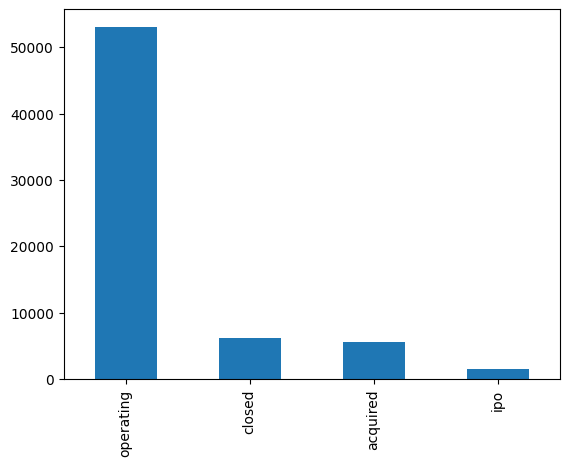

In [6]:
raw_data['status'].value_counts().plot(kind='bar')

Our objective is to find whether the startup will fail (closed) or success (acquier/ipo), so we dont need operating status. We will drop these rows.

In [7]:
success_startup = np.logical_or(raw_data['status'] == 'ipo', raw_data['status'] == 'acquired')
fail_startup = raw_data['status'] == 'closed'

raw_data['status'][fail_startup] = 'fail'
raw_data['status'][success_startup] = 'success'

/tmp/ipykernel_5427/516772136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['status'][fail_startup] = 'fail'
/tmp/ipykernel_5427/516772136.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['status'][success_startup] = 'success'


In [8]:
valid_index = (~(raw_data['status'] == 'operating'))

raw_data = raw_data[valid_index]

raw_data

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,2535000,success,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,1250000,success,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,35000000,success,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66349,/organization/zyncro,Zyncro,http://www.zyncro.com,Cloud Computing|Enterprise 2.0|Enterprise Soft...,3805520,success,ESP,56,Barcelona,Barcelona,2,2009-09-01,2011-04-05,2012-02-03
66350,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,Pharmaceuticals,13000000,success,USA,PA,Philadelphia,Radnor,1,2014-01-01,2014-10-14,2014-10-14
66352,/organization/zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,866550786,success,USA,CA,SF Bay Area,San Francisco,9,2007-07-01,2007-01-01,2011-02-18
66358,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,15419877,fail,MYS,14,MYS - Other,Damansara New Village,4,1994-01-01,2008-01-01,2013-02-15


<Axes: >

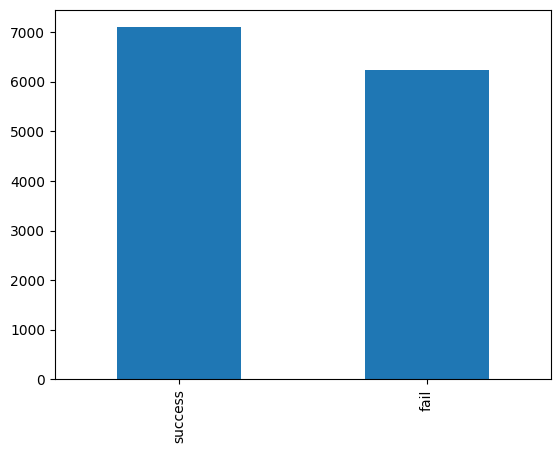

In [9]:
raw_data['status'].value_counts().plot(kind='bar')

### Check Duplicate Startup Name

In [10]:
check_name = raw_data['name'].value_counts()

check_name[check_name > 1]

SpaceConnect              2
SquareOne                 2
Stream                    2
Bloodhound                2
Stupsr                    2
Cardiovascular Systems    2
SHIFT                     2
Archive                   2
Name: name, dtype: int64

There are 239 duplicated startup name, lets check wheter the startup has the same name or the data is just duplicated by checking the permalink column.

In [11]:
duplicate_name = check_name[check_name > 1].index

duplicate_inspect = raw_data[raw_data['name'].str.fullmatch('|'.join(duplicate_name)) == True]

duplicate_inspect[['permalink', 'name']]

,permalink,name
4120,/organization/archive,Archive
4121,/organization/archive-2,Archive
7537,/organization/bloodhound,Bloodhound
7538,/organization/bloodhound-2,Bloodhound
9738,/organization/cardiovascular-systems,Cardiovascular Systems
9739,/organization/cardiovascular-systems-incorporated,Cardiovascular Systems
51149,/organization/shift,SHIFT
51151,/organization/shift-4,SHIFT
53581,/organization/spaceconnect,SpaceConnect
53582,/organization/spaceconnect-2,SpaceConnect


Lets check the uniqueness of permalink column.

In [12]:
duplicate_inspect[['permalink', 'name']].nunique()

permalink    16
name          8
dtype: int64

The permalink is unique! However, one thing that bother me is that some of the duplicated startup name have similiar permalink, for example '3DIVAZ' startup have permalink '/organization/3divaz-2' and '/organization/3divaz-3', it could be that the data was inputed two times and the permalink is set to unique in the beginning, hence it automatically iterate the permalink name if the input data is same. But it is just speculation, we don't have enough information about the data. So for now lets assume these startup coincidentally have the same name.

### Check Data Types

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13334 entries, 15 to 66360
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          13334 non-null  object
 1   name               13333 non-null  object
 2   homepage_url       12117 non-null  object
 3   category_list      12248 non-null  object
 4   funding_total_usd  13334 non-null  object
 5   status             13334 non-null  object
 6   country_code       11343 non-null  object
 7   state_code         11125 non-null  object
 8   region             11182 non-null  object
 9   city               11182 non-null  object
 10  funding_rounds     13334 non-null  int64 
 11  founded_at         9602 non-null   object
 12  first_funding_at   13332 non-null  object
 13  last_funding_at    13334 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.5+ MB


The funding_total_usd data type is wrong, it should be float. Lets check how many data that have '-' element.

In [14]:
(raw_data['funding_total_usd'] == '-').value_counts()

False    11143
True      2191
Name: funding_total_usd, dtype: int64

In [15]:
raw_data['funding_total_usd'] = pd.to_numeric(
    arg=raw_data['funding_total_usd'],
    errors='coerce',
    downcast='float'
)

raw_data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000.0,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000.0,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,2535000.0,success,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,1250000.0,success,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,35000000.0,success,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08


Lets check again the NaN value after the conversion.

In [16]:
raw_data['funding_total_usd'].isna().value_counts()

False    11143
True      2191
Name: funding_total_usd, dtype: int64

It same! we can conclude that all non-numeric data is '-' not number with string (e.g. 10 mil usd).

## Visualize Data Distribution

### Numeric Data

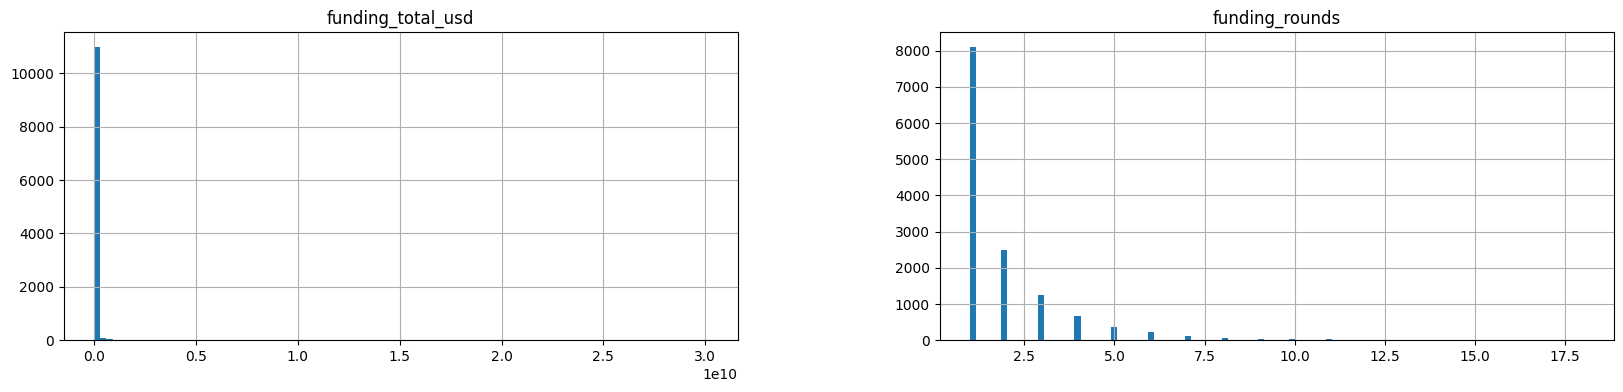

In [17]:
raw_data.hist(bins=100, figsize=(20, 4))

plt.show()

The funding_total_usd column distribution is hard to see, since it has a lot of outliers. So lets inspect the funding_total_usd column.

In [18]:
raw_data['funding_total_usd'].describe()

count    1.114300e+04
mean     3.580863e+07
std      3.687556e+08
min      2.000000e+00
25%      1.000000e+06
50%      5.800000e+06
75%      2.200000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

### Detect Outliers

The minimum value is 2 usd, which is doesn't make any sense, there is no way someone is funding a startup by 2 usd (it could be an invalid input). Lets check it further by using interquartile rule to find outliers.

In [19]:
def find_outliers(data):
    data = np.array(data.dropna())
    
    inter_quant = np.quantile(data, 0.75) - np.quantile(data, 0.25)
    
    upper_bound = np.quantile(data, 0.75) + 1.5*inter_quant
    lower_bound = np.quantile(data, 0.25) - 1.5*inter_quant
    
    lower_outliers = data < lower_bound
    upper_outliers = data > upper_bound
    
    return pd.Series(lower_outliers | upper_outliers)

In [20]:
outliers = find_outliers(raw_data['funding_total_usd'])


outliers

0        False
1        False
2        False
3        False
4        False
         ...  
11138    False
11139    False
11140     True
11141    False
11142    False
Length: 11143, dtype: bool

Lets check if our desired outliers (small number) still exist or not.

In [21]:
raw_data[['funding_total_usd']].dropna().reset_index(drop=True)[~outliers].describe()

,funding_total_usd
count,9.855000e+03
mean,9.508785e+06
std,1.222009e+07
min,2.000000e+00
25%,7.000000e+05
50%,4.000000e+06
75%,1.398045e+07
max,5.350000e+07


Nope, the interquartile method just remove the upper outliers. Which is in this context, it still possible for startup to get up to 1x10^10 usd fund, so lets keep the upper bound outliers. We will consider snother method to remove lower bound outliers. Let set a threshold for 1000 usd, it means anything under 1000 usd fund considered as invalid input.

In [22]:
valid_input = ~(raw_data['funding_total_usd'] < 1000)

raw_data[['funding_total_usd']][valid_input]

,funding_total_usd
15,5000000.0
20,500000.0
23,2535000.0
31,1250000.0
32,35000000.0
...,...
66349,3805520.0
66350,13000000.0
66352,866550786.0
66358,15419877.0


Lets see what row that has invalid input in funding_total_usd column.

In [23]:
invalid_input_id = raw_data[['funding_total_usd']][~valid_input].index

invalid_input_id

Int64Index([6371, 6487, 55916, 66220], dtype='int64')

In [24]:
raw_data = raw_data.drop(
    invalid_input_id,
    errors='ignore'
)

Lets visualize the distribution.

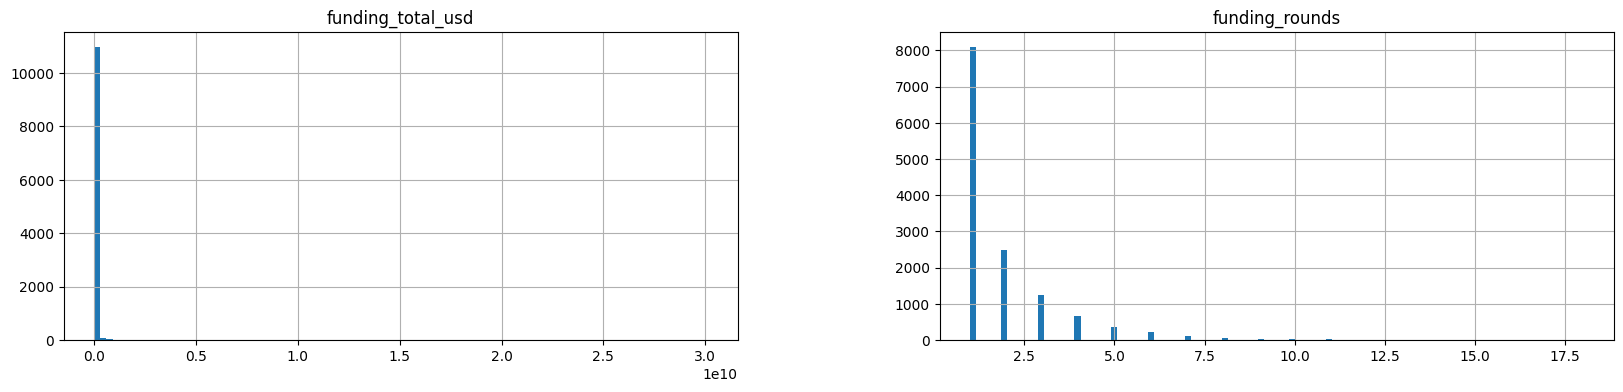

In [25]:
raw_data.hist(
    bins=100,
    figsize=(20, 4)
)

plt.show()

It still not clear what happened with the distribution (we just eliminate the lower bound outliers, where the main problem of unclear visualization is the upper bound outliers). Lets Continue to the categorical data.

### Categorical Data

In [26]:
cat_data = raw_data.select_dtypes(include=object)

cat_data.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,success,USA,CA,SF Bay Area,Cupertino,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,success,USA,WA,Seattle,Seattle,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,success,USA,CA,SF Bay Area,San Francisco,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,success,USA,CA,SF Bay Area,San Francisco,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,success,USA,NY,New York City,New York,2000-01-01,2010-03-08,2010-03-08


### Check Uniqueness of the Data

In [27]:
cat_data.nunique()

permalink           13330
name                13321
homepage_url        12096
category_list        5745
status                  2
country_code           84
state_code            209
region                595
city                 1711
founded_at           1637
first_funding_at     3789
last_funding_at      3666
dtype: int64

That's a lot of unique values! Lets just drop the permalink, name, and hompeage_url because these columns almost unique, so there is no point to plot the distribution.
<br>

Next, lets inspect each the category_list because it look like it has too many unique value. 

### category_list

In [28]:
cat_data

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,success,USA,CA,SF Bay Area,Cupertino,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,success,USA,WA,Seattle,Seattle,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,success,USA,CA,SF Bay Area,San Francisco,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,success,USA,CA,SF Bay Area,San Francisco,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,success,USA,NY,New York City,New York,2000-01-01,2010-03-08,2010-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...
66349,/organization/zyncro,Zyncro,http://www.zyncro.com,Cloud Computing|Enterprise 2.0|Enterprise Soft...,success,ESP,56,Barcelona,Barcelona,2009-09-01,2011-04-05,2012-02-03
66350,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,Pharmaceuticals,success,USA,PA,Philadelphia,Radnor,2014-01-01,2014-10-14,2014-10-14
66352,/organization/zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,success,USA,CA,SF Bay Area,San Francisco,2007-07-01,2007-01-01,2011-02-18
66358,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,fail,MYS,14,MYS - Other,Damansara New Village,1994-01-01,2008-01-01,2013-02-15


In [29]:
count_categories = cat_data['category_list'].value_counts()

count_categories

Software                                                            917
Biotechnology                                                       807
Curated Web                                                         373
Mobile                                                              272
Enterprise Software                                                 247
                                                                   ... 
Networking|Technology|Web Hosting                                     1
E-Commerce|Facebook Applications                                      1
Collaborative Consumption|E-Commerce|Marketplaces|Tourism|Travel      1
Apps|Internet                                                         1
Facebook Applications|Games|Networking|Technology                     1
Name: category_list, Length: 5745, dtype: int64

As we can see, startup that has multiple categories treated as unique, for now lets drop these startup, we will come back later in data preprocessing to include it in machine learning pipeline.
<br>
We can see a pattern here, it consider multiple categories when '|' appears, so lets find these values

In [30]:
mul_categories = count_categories.index.str.replace('|', ',').str.contains(',')

mul_categories

/tmp/ipykernel_5427/235368749.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mul_categories = count_categories.index.str.replace('|', ',').str.contains(',')


array([False, False, False, ...,  True,  True,  True])

In [31]:
single_categories = count_categories[~mul_categories]

single_categories

Software               917
Biotechnology          807
Curated Web            373
Mobile                 272
Enterprise Software    247
                      ... 
Trading                  1
Clinical Trials          1
Smart Grid               1
Bitcoin                  1
Developer APIs           1
Name: category_list, Length: 214, dtype: int64

We got the single_categories list! We will use it in data preprocessing to cluster the categories_list by using One Hot Encoder.

## EDA Conclusion

Lets wrap it up:
1. SInce our objective is predict if startup success or not (ipo, acquired, closed), we drop the 'operating' rows.
2. The target variables not uniformly distributed, so we will evaluate our model using ROC-AUC or F1 score later.
3. There are suspectible duplicate startup data, however permalink treat it as unique, so for now we assume these startups with the same name is unique.
4. The funding_total_usd contains outliers (the lower bound one), since it doesn't make any sense for someone to fund a startup by just 2 usd...
5. Some startups have multiple categories in category_list, we will transform it in data preprocessing later before do machine learning modeling.

## Data Preprocessing

Since the permalink and is name almost unique, we can drop these features.

In [32]:
data = raw_data.drop(['permalink', 'name'], axis=1).reset_index(drop=True)

data

,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000.0,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17
1,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000.0,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15
2,http://1000memories.com,Curated Web,2535000.0,success,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16
3,http://www.100plus.com,Analytics,1250000.0,success,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30
4,http://www.1010data.com,Software,35000000.0,success,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...
13325,http://www.zyncro.com,Cloud Computing|Enterprise 2.0|Enterprise Soft...,3805520.0,success,ESP,56,Barcelona,Barcelona,2,2009-09-01,2011-04-05,2012-02-03
13326,http://zynerba.com,Pharmaceuticals,13000000.0,success,USA,PA,Philadelphia,Radnor,1,2014-01-01,2014-10-14,2014-10-14
13327,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,866550786.0,success,USA,CA,SF Bay Area,San Francisco,9,2007-07-01,2007-01-01,2011-02-18
13328,http://www.zyraz.com,Biotechnology,15419877.0,fail,MYS,14,MYS - Other,Damansara New Village,4,1994-01-01,2008-01-01,2013-02-15


### Data Split

In [33]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(
    data.drop('status', axis=1),
    data[['status']],
    test_size=0.2,
    random_state=69
)

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=69
)

In [34]:
X_train.head()

,homepage_url,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
5399,http://www.ilike.com/,Artists Globally|Social Media,16500000.0,USA,WA,Seattle,Seattle,3,2012-04-28,2002-01-01,2006-01-01
8282,http://www.openair.com,Software,16000000.0,USA,MA,Boston,Boston,1,1999-01-01,2000-01-01,2000-01-01
6398,https://www.lendvo.com,NaN,1325000.0,NaN,NaN,NaN,NaN,1,2015-06-23,2015-06-23,2015-06-23
2645,http://www.complete.ie,Web Hosting,5630000.0,NaN,NaN,NaN,NaN,1,2001-01-01,2007-09-24,2007-09-24
4711,http://www.glossybox.com,Beauty|Communities|E-Commerce,NaN,DEU,16,Berlin,Berlin,2,2011-01-01,2011-02-15,2011-05-31


### Valid Input for homepage_url

In [35]:
# protocol url
protocol_raw = X_train['homepage_url'].str.split(':').str[0]
valid_protocol = protocol_raw.value_counts().index

# domain url
dom_raw = X_train['homepage_url'].str.split('.', n=2).str[-1].str.split('/').str[0]
valid_dom = dom_raw.value_counts()[dom_raw.value_counts() > 4].index

### homepage_url Pipeline

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

class UrlTrans(BaseEstimator, TransformerMixin):
    def __init__(self, protocol, domain):
        self.protocol = protocol
        self.domain = domain
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        protocol_raw = X['homepage_url'].str.split(':').str[0]
        protocol_invalid_index = (~protocol_raw.str.fullmatch('|'.join(self.protocol)).astype(bool))
        protocol_raw[protocol_invalid_index] = None
        
        dom_raw = X['homepage_url'].str.split('.', n=2).str[-1].str.split('/').str[0]
        dom_invalid_index = (~dom_raw.str.fullmatch('|'.join(self.domain)).astype(bool))
        dom_raw[dom_invalid_index] = None
        
        X['protocol_url'] = protocol_raw
        X['domain_url'] = dom_raw
        
        return X.drop('homepage_url', axis=1)

### category_list Pipeline

In [37]:
class CatTrans(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['category_list'] = X['category_list'].fillna('Others').str.split('|')
        
        return X

### Date Pipeline

In [38]:
class DateSeparator(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        for item in (['founded_at', 'first_funding_at', 'last_funding_at']):
            temp_date = pd.to_datetime(X[item], errors='coerce').dt
            
            X[f'day_{item}'] = temp_date.day
            X[f'month_{item}'] = temp_date.month
            X[f'year_{item}'] = temp_date.year
            
            X = X.drop(item, axis=1)
            
        return X

### Categorical Pipeline

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer

cat_trans = make_pipeline(
    UrlTrans(valid_protocol, valid_dom),
    CatTrans(),
    DateSeparator()
)

cat_trans

Pipeline(steps=[('urltrans',
                 UrlTrans(domain=Index(['com', 'net', 'ru', 'co', 'io', 'de', 'org', 'co.uk', 'com.br', 'me',
       'tv', 'us', 'in', 'fr', 'ca', 'jp', 'it', 'com.au', 'fm', 'nl', 'cn',
       'se', 'uk', 'eu', 'com.cn', 'es', 'pl', 'mobi', 'ch', 'cc', 'ag', 'no',
       'ly', 'info', 'co.jp', 'au', 'cz'],
      dtype='object'),
                          protocol=Index(['http', 'https'], dtype='object'))),
                ('cattrans', CatTrans()), ('dateseparator', DateSeparator())])

In [40]:
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = MultiLabelBinarizer(*args, **kwargs)
        
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    
    def transform(self, x, y=0):
        return self.encoder.transform(x)

class DfToSeries(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.iloc[:, 0]
    
multi_label = make_pipeline(
    DfToSeries(),
    MyLabelBinarizer()
)

multi_label

Pipeline(steps=[('dftoseries', DfToSeries()),
                ('mylabelbinarizer',
                 <__main__.MyLabelBinarizer object at 0x7f9b078d0bd0>)])

In [41]:
date_column = []

for item in (['founded_at', 'first_funding_at', 'last_funding_at']):
    for i in (['day', 'month', 'year']):
        date_column.append(f'{i}_{item}')
        
date_column

['day_founded_at',
 'month_founded_at',
 'year_founded_at',
 'day_first_funding_at',
 'month_first_funding_at',
 'year_first_funding_at',
 'day_last_funding_at',
 'month_last_funding_at',
 'year_last_funding_at']

In [42]:
from sklearn.impute import SimpleImputer

encoder_trans = ColumnTransformer([
    ('Multi Label Binarizer', multi_label, ['category_list']),
    ('One Hot Encoder', OneHotEncoder(handle_unknown='ignore'), ['country_code', 'state_code', 'city', 'protocol_url', 'domain_url']),
    ('Date Impute', SimpleImputer(strategy='most_frequent'), date_column)
])

encoder_trans

ColumnTransformer(transformers=[('Multi Label Binarizer',
                                 Pipeline(steps=[('dftoseries', DfToSeries()),
                                                 ('mylabelbinarizer',
                                                  <__main__.MyLabelBinarizer object at 0x7f9b078d0bd0>)]),
                                 ['category_list']),
                                ('One Hot Encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['country_code', 'state_code', 'city',
                                  'protocol_url', 'domain_url']),
                                ('Date Impute',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['day_founded_at', 'month_founded_at',
                                  'year_founded_at', 'day_first_funding_at',
                                  'month_first_funding_at',
                                  'year_first_funding_at',
                                  'day_last_funding_at',
                                  'month_last_funding_at',
                                  'year_last_funding_at'])])

In [43]:
cat_pipeline = make_pipeline(
    cat_trans,
    encoder_trans
)

cat_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('urltrans',
                                  UrlTrans(domain=Index(['com', 'net', 'ru', 'co', 'io', 'de', 'org', 'co.uk', 'com.br', 'me',
       'tv', 'us', 'in', 'fr', 'ca', 'jp', 'it', 'com.au', 'fm', 'nl', 'cn',
       'se', 'uk', 'eu', 'com.cn', 'es', 'pl', 'mobi', 'ch', 'cc', 'ag', 'no',
       'ly', 'info', 'co.jp', 'au', 'cz'],
      dtype='object'),
                                           protocol=Index(['http', 'https'], dtype='objec...
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['country_code', 'state_code',
                                                   'city', 'protocol_url',
                                                   'domain_url']),
                                                 ('Date Impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['day_founded_at',
                                                   'month_founded_at',
                                                   'year_founded_at',
                                                   'day_first_funding_at',
                                                   'month_first_funding_at',
                                                   'year_first_funding_at',
                                                   'day_last_funding_at',
                                                   'month_last_funding_at',
                                                   'year_last_funding_at'])]))])

### Numerical Pipeline

In [44]:
from sklearn.preprocessing import StandardScaler

num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

### Full Pipeline

In [45]:
cat_columns = X_train.select_dtypes(include=object).columns
num_columns = X_train.select_dtypes(exclude=object).columns

In [46]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

full_trans = ColumnTransformer([
    ('Categorical Pipeline', cat_pipeline, cat_columns),
    ('Numerical Pipeline', num_pipeline, num_columns)    
])

full_pipeline = make_pipeline(
    full_trans,
    PCA(n_components=0.99)
)

full_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Categorical Pipeline',
                                                  Pipeline(steps=[('pipeline',
                                                                   Pipeline(steps=[('urltrans',
                                                                                    UrlTrans(domain=Index(['com', 'net', 'ru', 'co', 'io', 'de', 'org', 'co.uk', 'com.br', 'me',
       'tv', 'us', 'in', 'fr', 'ca', 'jp', 'it', 'com.au', 'fm', 'nl', 'cn',
       'se', 'uk', 'eu', 'com.cn', 'es', 'pl', 'mobi', 'ch', 'cc', 'ag', 'no'...
                                                  Index(['homepage_url', 'category_list', 'country_code', 'state_code', 'region',
       'city', 'founded_at', 'first_funding_at', 'last_funding_at'],
      dtype='object')),
                                                 ('Numerical Pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['funding_total_usd', 'funding_rounds'], dtype='object'))])),
                ('pca', PCA(n_components=0.99))])

### Target Pipeline

In [47]:
from sklearn.preprocessing import OrdinalEncoder

target_pipeline = OrdinalEncoder()

target_pipeline

OrdinalEncoder()

### Data Transformation

In [48]:
full_pipeline.fit(X_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Categorical Pipeline',
                                                  Pipeline(steps=[('pipeline',
                                                                   Pipeline(steps=[('urltrans',
                                                                                    UrlTrans(domain=Index(['com', 'net', 'ru', 'co', 'io', 'de', 'org', 'co.uk', 'com.br', 'me',
       'tv', 'us', 'in', 'fr', 'ca', 'jp', 'it', 'com.au', 'fm', 'nl', 'cn',
       'se', 'uk', 'eu', 'com.cn', 'es', 'pl', 'mobi', 'ch', 'cc', 'ag', 'no'...
                                                  Index(['homepage_url', 'category_list', 'country_code', 'state_code', 'region',
       'city', 'founded_at', 'first_funding_at', 'last_funding_at'],
      dtype='object')),
                                                 ('Numerical Pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['funding_total_usd', 'funding_rounds'], dtype='object'))])),
                ('pca', PCA(n_components=0.99))])

In [49]:
target_pipeline.fit(y_train)

OrdinalEncoder()

In [50]:
target_pipeline.categories_

[array(['fail', 'success'], dtype=object)]

In [51]:
X_train_trans, X_val_trans, X_test_trans = full_pipeline.transform(X_train), full_pipeline.transform(X_val), full_pipeline.transform(X_test)

y_train_trans, y_val_trans, y_test_trans = target_pipeline.transform(y_train), target_pipeline.transform(y_val), target_pipeline.transform(y_test)

/home/alfian/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Cloud-Based Music', 'EDA Tools', 'Edutainment', 'Financial Exchanges', 'Gift Exchange', 'Governance', 'Graphic Design', 'Green Building', 'Hedge Funds', 'Local Commerce', 'Local Coupons', 'Mobile Search', 'Moneymaking', 'Operating Systems', 'Q&A', 'Recreation', 'Resorts', 'Self Storage', 'Social Activists', 'Teaching STEM Concepts', 'Video Processing'] will be ignored
  warnings.warn(
/home/alfian/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Angels', 'Animal Feed', 'Baby Boomers', 'Casual Games', 'Charter Schools', 'Comics', 'Debt Collecting', 'Enterprise Resource Planning', 'Enterprise Search', 'Estimation and Quoting', 'Governance', 'Graphic Design', 'HDTV', 'Hedge Funds', 'Independent Music Labels', 'Indians', 'Industrial Energy Efficiency', 'Internet Technology', 'Landscaping', 'Local Coupons', 'Lotteries

In [52]:
y_train_trans, y_val_trans, y_test_trans = y_train_trans.ravel(), y_val_trans.ravel(), y_test_trans.ravel()

In [53]:
X_train_trans.shape

(7998, 15)

## Modeling

### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train_trans, y_train_trans)

LogisticRegression()

In [68]:
from sklearn.metrics import roc_auc_score, confusion_matrix

lr_predict = lr_model.predict(X_val_trans)

lr_roc = roc_auc_score(
    y_val_trans,
    lr_predict,
    average='macro'
)

lr_matrix = confusion_matrix(
    y_val_trans,
    lr_predict
)

print(f'''
Logistic Regression Evaluation

Accuracy Score:
{lr_model.score(X_val_trans, y_val_trans)}

ROC-AUC Score:
{lr_roc}

Confusion Matrix:
{lr_matrix}
''')


Logistic Regression Evaluation

Accuracy Score:
0.7096774193548387

ROC-AUC Score:
0.7076915261125788

Confusion Matrix:
[[ 846  414]
 [ 360 1046]]



### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(X_train_trans, y_train_trans)

RandomForestClassifier()

In [69]:
rf_predict = rf_model.predict(X_val_trans)

rf_roc = roc_auc_score(
    y_val_trans,
    rf_predict,
    average='macro'
)

rf_matrix = confusion_matrix(
    y_val_trans,
    rf_predict
)

print(f'''
Random Forest Evaluation

Accuracy Score:
{rf_model.score(X_val_trans, y_val_trans)}

ROC-AUC Score:
{rf_roc}

Confusion Matrix:
{rf_matrix}
''')


Random Forest Evaluation

Accuracy Score:
0.7348087021755438

ROC-AUC Score:
0.7316828106301791

Confusion Matrix:
[[ 850  410]
 [ 297 1109]]



### Gradient Boosting

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()

gb_model.fit(X_train_trans, y_train_trans)

GradientBoostingClassifier()

In [70]:
gb_predict = gb_model.predict(X_val_trans)

gb_roc = roc_auc_score(
    y_val_trans,
    gb_predict,
    average='macro'
)

gb_matrix = confusion_matrix(
    y_val_trans,
    gb_predict
)

print(f'''
Gradient Boosting Evaluation

Accuracy Score:
{gb_model.score(X_val_trans, y_val_trans)}

ROC-AUC Score:
{gb_roc}

Confusion Matrix:
{gb_matrix}
''')


Gradient Boosting Evaluation

Accuracy Score:
0.735933983495874

ROC-AUC Score:
0.7332853530221951

Confusion Matrix:
[[ 863  397]
 [ 307 1099]]



### XGBoost

In [106]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(X_train_trans, y_train_trans)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [108]:
xgb_predict = xgb_model.predict(X_val_trans)

xgb_roc = roc_auc_score(
    y_val_trans,
    xgb_predict,
    average='macro'
)

xgb_matrix = confusion_matrix(
    y_val_trans,
    xgb_predict
)

print(f'''
Extreme Gradient Boosting Evaluation

Accuracy Score:
{xgb_model.score(X_val_trans, y_val_trans)}

ROC-AUC Score:
{xgb_roc}

Confusion Matrix:
{xgb_matrix}
''')


Extreme Gradient Boosting Evaluation

Accuracy Score:
0.7258064516129032

ROC-AUC Score:
0.7231479599900654

Confusion Matrix:
[[ 850  410]
 [ 321 1085]]



### Neural Network

In [97]:
from tensorflow.keras import Sequential, layers

nn_model = Sequential([
    layers.Dense(1024, activation='sigmoid'),
    layers.Dense(3, activation='softmax')
])

In [98]:
from tensorflow.keras import optimizers

nn_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.005),
    metrics='accuracy'
)

In [99]:
from tensorflow.keras import callbacks

nn_model.fit(
    X_train_trans,
    y_train_trans,
    epochs=100,
    validation_data=[X_val_trans, y_val_trans],
    callbacks=[
        callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6483 - accuracy: 0.6683 - val_loss: 0.5728 - val_accuracy: 0.7022
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6174 - accuracy: 0.6882 - val_loss: 0.6370 - val_accuracy: 0.6834
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5993 - accuracy: 0.6922 - val_loss: 0.6370 - val_accuracy: 0.6793
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5983 - accuracy: 0.6942 - val_loss: 0.5880 - val_accuracy: 0.6965
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5947 - accuracy: 0.6989 - val_loss: 0.5543 - val_accuracy: 0.7146
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6012 - accuracy: 0.6964 - val_loss: 0.5650 - val_accuracy: 0.7123
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5803 - accuracy: 0.7018 - val_loss: 0.5645 - val_accuracy: 0.7198

In [100]:
nn_predict = nn_model.predict(X_val_trans).argmax(axis=-1)

nn_roc = roc_auc_score(
    y_val_trans,
    nn_predict,
    average='macro'
)
nn_matrix = confusion_matrix(
    y_val_trans,
    nn_predict
)

print(f'''
Neural Network Evaluation

Accuracy Score:
{nn_model.evaluate(X_val_trans, y_val_trans)[-1]}

ROC-AUC Score:
{nn_roc}

Confusion Matrix:
{nn_matrix}
''')

84/84 [==============================] - 0s 1ms/step - loss: 0.5447 - accuracy: 0.7254

Neural Network Evaluation

Accuracy Score:
0.7254313826560974

ROC-AUC Score:
0.7232456140350877

Confusion Matrix:
[[ 861  399]
 [ 333 1073]]

